Add training examples from TDT to XED, then evaluate performance on XED data. This was not found to improve performance.

In [1]:
# Set the file paths here
tdt_train_fn = '/content/tdt-sentiment-151020-train-clean.tsv'
xed_nonneutrals_fn = '/content/fi-annotated.tsv'
xed_neutrals_fn = '/content/neu_fi.txt'

In [ ]:
!pip install transformers

In [3]:
# Choose model and set up input

from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast
import tensorflow as tf

def transpose(l):
  return [list(t) for t in zip(*l)]

def load_fields(fn):
  return transpose([l.rstrip('\n').split('\t') for l in open(fn).readlines()])

tdt_train_texts, tdt_train_labels_raw = load_fields(tdt_train_fn)[1:3]

tdt_train_labels_binary = [1 if s == 'neutral' else 0 for s in tdt_train_labels_raw]

neutral_texts = load_fields(xed_neutrals_fn)[1]
neutral_labels_binary = [1]*len(neutral_texts)
nonneutral_texts = load_fields(xed_nonneutrals_fn)[0]
nonneutral_labels_binary = [0]*len(nonneutral_texts)

xed_texts = neutral_texts + nonneutral_texts
xed_labels_binary = neutral_labels_binary + nonneutral_labels_binary

xed_train_texts, xed_eval_texts, xed_train_labels_binary, xed_eval_labels_binary = train_test_split(xed_texts, xed_labels_binary, test_size=0.2)

#model_name = "TurkuNLP/bert-base-finnish-cased-v1"
model_name = "TurkuNLP/bert-base-finnish-uncased-v1"

tokenizer = BertTokenizerFast.from_pretrained(model_name)

input_size = 64

eval_encodings = tokenizer(xed_eval_texts, truncation=True, padding='longest', max_length=input_size)

In [4]:
# Set up training
from transformers import TFBertForSequenceClassification, optimization_tf
from math import inf

e = [tf.constant(eval_encodings.data['input_ids']),
     tf.constant(eval_encodings.data['attention_mask']),
     tf.constant(eval_encodings.data['token_type_ids'])]

init_lr = 2e-5

epochs = 2
batch_size_train = 16
batch_size_eval = 16

def train(model, t, train_labels, eval):
  size_train = len(train_labels)
  steps_per_epoch = int(size_train/batch_size_train)
  steps_train = steps_per_epoch*epochs
  steps_warmup = int(epochs * size_train * 0.1 / batch_size_train)
  optimizer, _ = optimization_tf.create_optimizer(init_lr=init_lr,
                                                  num_train_steps=steps_train,
                                                  num_warmup_steps=steps_warmup,
                                                  weight_decay_rate=0.01)
  model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['sparse_categorical_accuracy'])
  model.fit(t,
            train_labels,
            validation_data=eval,
            batch_size=batch_size_train,
            epochs=epochs,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=100, restore_best_weights=True)])
  return model

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-uncased-v1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f9ebd802e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f9ebd802e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


1263/1263 [==============================] - ETA: 0s - loss: 0.5645 - sparse_categorical_accuracy: 0.6776

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


1263/1263 [==============================] - 329s 228ms/step - loss: 0.5645 - sparse_categorical_accuracy: 0.6777 - val_loss: 0.4630 - val_sparse_categorical_accuracy: 0.7641
Epoch 2/2
1263/1263 [==============================] - 286s 226ms/step - loss: 0.3939 - sparse_categorical_accuracy: 0.8096 - val_loss: 0.4835 - val_sparse_categorical_accuracy: 0.7596


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-uncased-v1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in g

Epoch 1/2


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


1949/1949 [==============================] - ETA: 0s - loss: 0.5322 - sparse_categorical_accuracy: 0.7057

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


1949/1949 [==============================] - 526s 262ms/step - loss: 0.5322 - sparse_categorical_accuracy: 0.7057 - val_loss: 0.4736 - val_sparse_categorical_accuracy: 0.7619
Epoch 2/2
1949/1949 [==============================] - 508s 260ms/step - loss: 0.3356 - sparse_categorical_accuracy: 0.8453 - val_loss: 0.4974 - val_sparse_categorical_accuracy: 0.7538


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Model: TurkuNLP/bert-base-finnish-uncased-v1, initial learning rate = 2e-05, input size = 64, batch size = 16, epochs = 2

Statistics for XED only
Accuracy:  0.7596
Weighted F-score:  0.7582
ROC AUC:  0.8531
Average accuracy: 0.7596, standard deviation: 0.0000
Average weighted F-score: 0.7582, standard deviation: 0.0000
Average ROC AUC: 0.8531, standard deviation: 0.0000

Statistics for XED+TDT
Accuracy:  0.7538
Weighted F-score:  0.7526
ROC AUC:  0.8455
Average accuracy: 0.7538, standard deviation: 0.0000
Average weighted F-score: 0.7526, standard deviation: 0.0000
Average ROC AUC: 0.8455, standard deviation: 0.0000



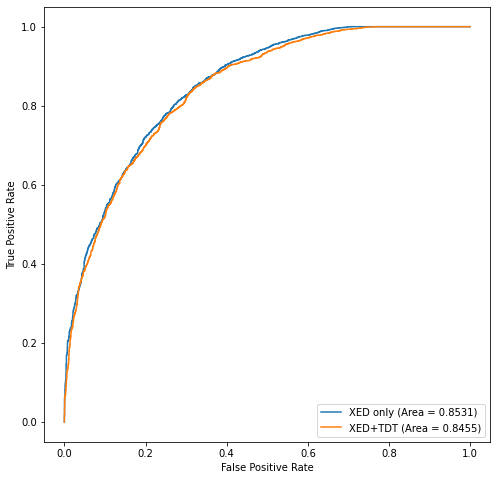

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.utils.extmath import softmax

d = defaultdict(list)
for text, label in zip(tdt_train_texts, tdt_train_labels_raw):
  d[label].append(text)

train_texts_positive = xed_train_texts + d['positive']
train_labels_positive = xed_train_labels_binary + [0]*len(d['positive'])

train_texts_negative = xed_train_texts + d['negative']
train_labels_negative = xed_train_labels_binary + [0]*len(d['negative'])

tdt_nonneutral = d['positive'] + d['negative'] + d['other']
train_texts_nonneutral = xed_train_texts + tdt_nonneutral
train_labels_nonneutral = xed_train_labels_binary + [0]*len(tdt_nonneutral)

train_texts_neutral = xed_train_texts + d['neutral']
train_labels_neutral = xed_train_labels_binary + [0]*len(d['neutral'])

xed_tdt_texts = xed_train_texts + tdt_train_texts
xed_tdt_labels_binary = xed_train_labels_binary + tdt_train_labels_binary

train_encodings_xed = tokenizer(xed_train_texts, truncation=True, padding='longest', max_length=input_size)
train_encodings_xed_tdt = tokenizer(xed_tdt_texts, truncation=True, padding='longest', max_length=input_size)
train_encodings_positive = tokenizer(train_texts_positive, truncation=True, padding='longest', max_length=input_size)
train_encodings_negative = tokenizer(train_texts_negative, truncation=True, padding='longest', max_length=input_size)
train_encodings_nonneutral = tokenizer(train_texts_nonneutral, truncation=True, padding='longest', max_length=input_size)
train_encodings_neutral = tokenizer(train_texts_neutral, truncation=True, padding='longest', max_length=input_size)

t_xed = [tf.constant(train_encodings_xed.data['input_ids']),
         tf.constant(train_encodings_xed.data['attention_mask']),
         tf.constant(train_encodings_xed.data['token_type_ids'])]

t_xed_tdt = [tf.constant(train_encodings_xed_tdt.data['input_ids']),
             tf.constant(train_encodings_xed_tdt.data['attention_mask']),
             tf.constant(train_encodings_xed_tdt.data['token_type_ids'])]

t_positive = [tf.constant(train_encodings_positive.data['input_ids']),
              tf.constant(train_encodings_positive.data['attention_mask']),
              tf.constant(train_encodings_positive.data['token_type_ids'])]

t_negative = [tf.constant(train_encodings_negative.data['input_ids']),
              tf.constant(train_encodings_negative.data['attention_mask']),
              tf.constant(train_encodings_negative.data['token_type_ids'])]

t_nonneutral = [tf.constant(train_encodings_nonneutral.data['input_ids']),
                tf.constant(train_encodings_nonneutral.data['attention_mask']),
                tf.constant(train_encodings_nonneutral.data['token_type_ids'])]

t_neutral = [tf.constant(train_encodings_neutral.data['input_ids']),
             tf.constant(train_encodings_neutral.data['attention_mask']),
             tf.constant(train_encodings_neutral.data['token_type_ids'])]

def train_evaluate(train_x, train_y, eval_x, eval_y, run_count):
  num_labels = 2
  runs = []
  for i in range(run_count):
    bert = TFBertForSequenceClassification.from_pretrained(model_name,
                                                          num_labels=num_labels)
    bert = train(bert, train_x, train_y, (eval_x, eval_y))
    runs.append(bert.predict(eval_x)[0])
  return runs

train_lists = [(t_xed, tf.constant(xed_train_labels_binary), 'XED only'),
               (t_xed_tdt, tf.constant(xed_tdt_labels_binary), 'XED+TDT')]
               (t_positive, tf.constant(train_labels_positive), 'XED + Positive TDT'),
               (t_negative, tf.constant(train_labels_negative), 'XED + Negative TDT'),
               (t_nonneutral, tf.constant(train_labels_nonneutral), 'XED + Non-neutral TDT'),
               (t_neutral, tf.constant(train_labels_neutral), 'XED + Neutral TDT')]

eval_binary = tf.constant(xed_eval_labels_binary)

run_lists = [(train_evaluate(train_x, train_y, e, eval_binary, 3), name) for (train_x, train_y, name) in train_lists]

plt.figure(figsize=(8, 8))

def format_floats(l):
  return ', '.join(f'{x:.4f}' for x in l)

print(f"Model: {model_name}, initial learning rate = {init_lr}, input size = {input_size}, batch size = {batch_size_train}, epochs = {epochs}\n")

for preds, name in run_lists:
  accuracy = [accuracy_score(eval_binary, p.argmax(-1)) for p in preds]
  weighted_f1 = [f1_score(eval_binary, p.argmax(-1), average='weighted') for p in preds]
  roc = [roc_curve(eval_binary, softmax(p)[:,1]) for p in preds]
  aucs = [auc(fpr, tpr) for fpr, tpr, _ in roc]
  max_i = aucs.index(max(aucs))
  print(f'Statistics for {name}')
  print('Accuracy: ', format_floats(accuracy))
  print('Weighted F-score: ', format_floats(weighted_f1))
  print('ROC AUC: ', format_floats(aucs))
  print(f'Average accuracy: {np.mean(accuracy):.4f}, standard deviation: {np.std(accuracy):.4f}')
  print(f'Average weighted F-score: {np.mean(weighted_f1):.4f}, standard deviation: {np.std(weighted_f1):.4f}')
  print(f'Average ROC AUC: {np.mean(aucs):.4f}, standard deviation: {np.std(aucs):.4f}')
  print()
  fpr, tpr, _ = roc[max_i]
  plt.plot(fpr, tpr, label=f'{name} (Area = {aucs[max_i]:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()